<a href="https://colab.research.google.com/github/vamshikondisetti/Assignment/blob/Excler_Assignments/Assignment_3_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

We are going to conduct a 2 tailed t-Test on 2 Independent samples with Numerical Data
We need to check whether the mean of both samples are different and
Is there any significance difference between the two samples?

# Null Hypothesis:  μ1=μ2
Alternative Hypthosis:  μ1≠μ2

In [ ]:
#Significance 5%
#alpha = 0.05
cutlets = pd.read_csv('Cutlets.csv')
cutlets.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [ ]:
### Applying Descriptive Statistics
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [ ]:
### Checking for Null Values
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [ ]:
### Checking for Duplicate Values
cutlets[cutlets.duplicated()].shape

(0, 2)

In [ ]:
### Checking the data type
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


# Plotting Q-Q plot to check whether the distribution follows normal distribution or not

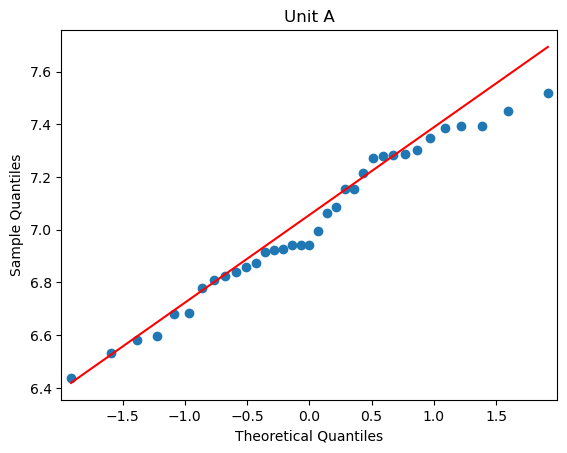

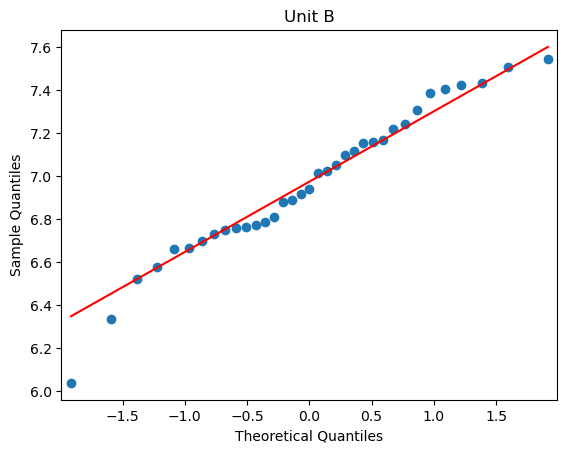

In [ ]:
sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

In [ ]:
#Compare Evidences with Hypothesis using t-statistics
statistic , p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


If p_value is  ≠  ' α  ' we failed to reject Null Hypothesis because of lack of evidence


If p_value is = ' α  ' we reject Null Hypothesis

# Question 2

# We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data

We need to check whether the mean of any of these samples are different or the same?

Null Hypothesis:  μ1=μ2  =  μ3  =  μ4
Alternative Hypthosis: Atleast One of them is Differente

In [ ]:
# Significance 5%
# alpha = 0.05

In [ ]:
labtat = pd.read_csv('LabTAT.csv')
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [ ]:
### Applying Descriptive Statistics
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [ ]:
### Checking for Null Values
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [ ]:
### Checking for Duplicate Values
labtat[labtat.duplicated()].shape

(0, 4)

# Plotting Q-Q plot to check whether the distribution follows normal distribution or not

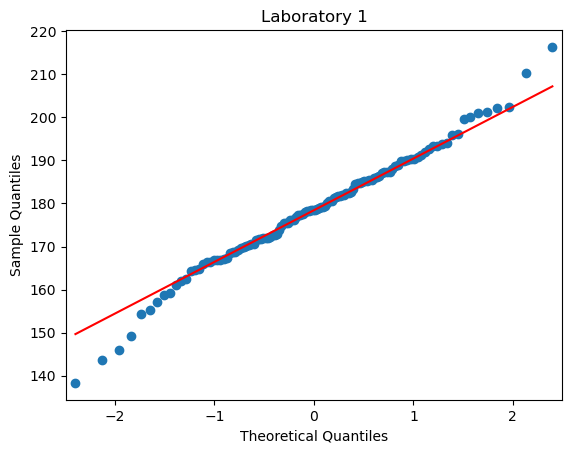

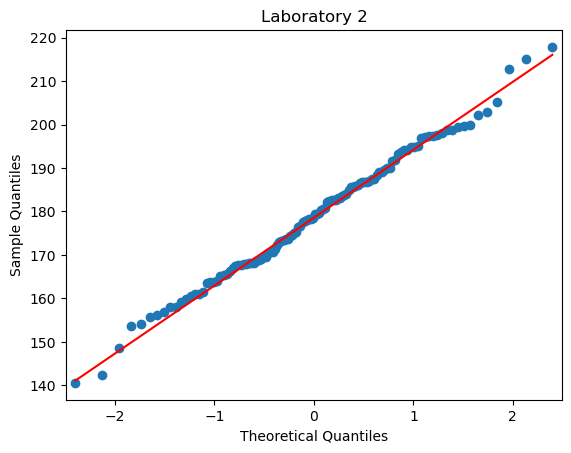

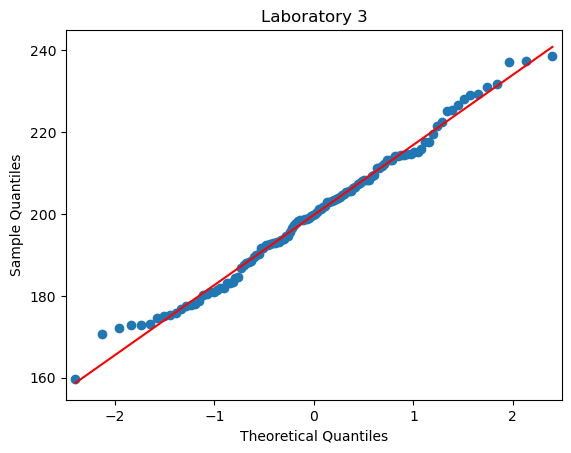

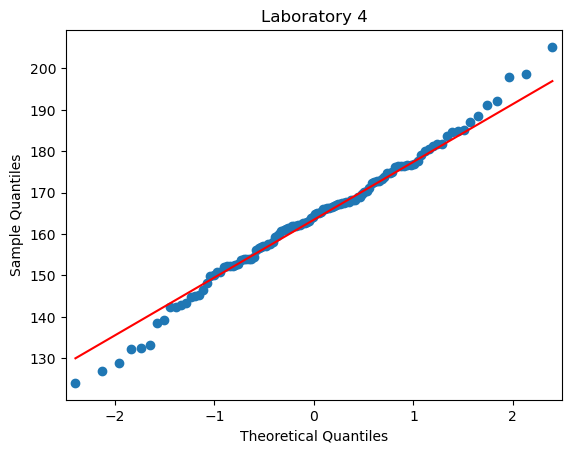

In [ ]:
sm.qqplot(labtat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labtat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labtat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labtat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

In [ ]:
stats.f_oneway(labtat.iloc[:,0], labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

# Compare p_value with ' α  '(Significane Level)
# If p_value is ≠ 'α ' we failed to reject Null Hypothesis because of lack of evidence
# If p_value is = 'α ' we reject Null Hypothesis

# Question 3

In [ ]:
buyer = pd.read_csv('BuyerRatio.csv', index_col = 0)
buyer

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [ ]:
stat, p, dof, exp = stats.chi2_contingency(buyer)
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [ ]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

Comparing Evidence with Hypothesis

In [ ]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


# Compare p_value with 'α '(Significane Level)
# If p_value is  ≠  ' α  ' we failed to reject Null Hypothesis because of lack of evidence
# If p_value is = ' α  ' we reject Null Hypothesis

# Question 4

We are going to conduct a Test of Independence using Chi-Square  χ2  test with Contingency table

In [ ]:
centers = pd.read_csv('Costomer+OrderForm.csv')
centers.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [ ]:
#Checking value counts in data
print(centers['Phillippines'].value_counts(),'\n','\n',centers['Indonesia'].value_counts(),'\n','\n',centers['Malta'].value_counts(),'\n','\n',centers['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 
 Error Free    280
Defective      20
Name: India, dtype: int64


Creating Contingency table

In [ ]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [ ]:
type(contingency_table)

list

Calculating Expected Values for Observed data

In [ ]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


Defining Expected values and observed values

In [ ]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [ ]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


# Compare p_value with ' α  '(Significane Level)
# If p_value is ≠ 'α ' we failed to reject Null Hypothesis because of lack of evidence
# If p_value is = 'α ' we reject Null Hypothesis